In [210]:
import warnings
from pandas import Series
import pandas as pd
# statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime as dt
from sklearn.metrics import mean_squared_error
import math
from matplotlib import pyplot


In [90]:
dataset = pd.read_excel('Dataset.xlsx')

In [91]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2059 non-null   datetime64[ns]
 1   Price   2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.3 KB


In [92]:
dataset = dataset.groupby(pd.Grouper(key="Date", freq="M"))['Price'].mean()

In [98]:
df = pd.DataFrame(dataset).reset_index()

In [105]:
X_test = df[:-20]
X_train = df.tail(20)

<AxesSubplot:>

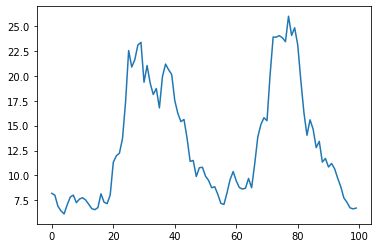

In [110]:
df['Price'].plot()

<AxesSubplot:>

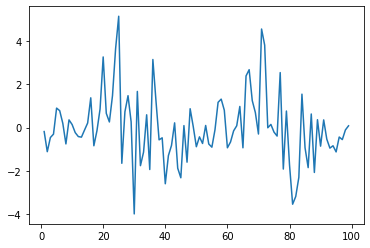

In [235]:
# We will make our time series stationray 
series = df['Price'].diff().dropna()
series.plot()

In [129]:
# Here we are fitting data to our model
model = ARIMA(series, order=(1,0,0))
model_fit = model.fit()

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
# Lets check the summary !!!
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   99
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -183.030
Date:                Sun, 14 May 2023   AIC                            372.060
Time:                        09:48:51   BIC                            379.846
Sample:                             0   HQIC                           375.210
                                 - 99                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0151      0.209     -0.072      0.942      -0.425       0.395
ar.L1          0.2239      0.071      3.143      0.002       0.084       0.363
sigma2         2.3612      0.292      8.094      0.0

<AxesSubplot:>

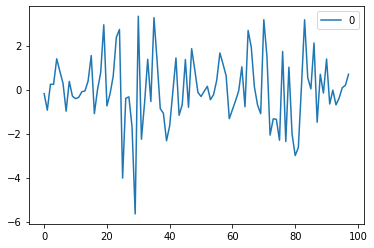

In [239]:
# check teh residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

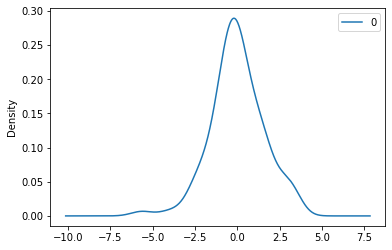

In [240]:
residuals.plot(kind='kde')

In [136]:
# Take note thate our mean is #Zero
print(residuals.describe())

               0
count  99.000000
mean    0.000329
std     1.544453
min    -4.050770
25%    -0.826833
50%    -0.137316
75%     0.753315
max     4.649028


In [243]:
X_train = series[:-20]
X_test = series.tail(20)

In [246]:
X_train.shape , X_test.shape,

1    -0.184115
2    -1.117444
3    -0.460260
4    -0.303955
5     0.903955
        ...   
95   -1.127446
96   -0.437273
97   -0.556091
98   -0.108000
99    0.082143
Name: Price, Length: 99, dtype: float64

In [223]:
size = int(len(X_train) * 0.66)
train, test = X_train, X_test
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.405984, expected=-1.732136
predicted=-0.374331, expected=-3.552864
predicted=-0.338854, expected=-3.195318
predicted=-2.472735, expected=-2.307095
predicted=-1.739374, expected=1.550104
predicted=-1.446244, expected=-0.937190
predicted=-2.007243, expected=-1.856273
predicted=-1.564130, expected=0.630273
predicted=-0.477302, expected=-2.080222
predicted=-0.374694, expected=0.365404
predicted=-0.650075, expected=-0.860404
predicted=-1.119396, expected=0.356508
predicted=0.158582, expected=-0.536104
predicted=-0.937806, expected=-0.951515
predicted=-0.136569, expected=-0.842857
predicted=-0.737655, expected=-1.127446
predicted=-0.523503, expected=-0.437273
predicted=-0.755988, expected=-0.556091
predicted=-0.805754, expected=-0.108000
predicted=-0.537570, expected=0.082143


Test RMSE: 1.519


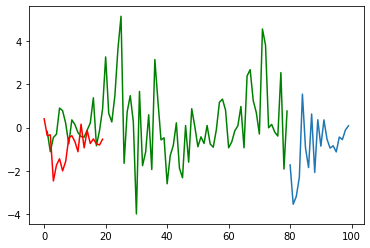

In [224]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(train, color='green')
pyplot.plot(test)
pyplot.plot(predictions, color='red')


In [228]:
len(output)

1

In [229]:
print(series.describe())

count    99.000000
mean     -0.014951
std       1.585500
min      -4.002619
25%      -0.873849
50%      -0.142045
75%       0.749833
max       5.162773
Name: Price, dtype: float64


In [231]:
dataset.to_clipboard()